# Prediction

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [18]:
df = pd.read_csv("processed.csv")
df.head()

,Player,Team,#,Nation,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,...,Position_RB,Position_GK,Position_RW,Position_AM,Position_FW,Position_LB,Position_CB,Position_LW,Position_LM,Position_RM
0,0,0,3,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,3,0,18,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,3,0,8,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,30,0,90,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
y = df["Goals"]
X = df.drop(columns=["Goals"])

In [20]:
numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Scale only the numeric columns
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_columns])

# Convert scaled numeric data back to a DataFrame
X_scaled_numeric_df = pd.DataFrame(X_scaled_numeric, columns=numeric_columns, index=X.index)

# Combine scaled numeric data with non-numeric data
X_scaled = pd.concat([X_scaled_numeric_df, X[non_numeric_columns]], axis=1)

# Check the result
X_scaled.describe()

,Player,Team,#,Nation,Minutes,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,...,Position_RB,Position_GK,Position_RW,Position_AM,Position_FW,Position_LB,Position_CB,Position_LW,Position_LM,Position_RM
count,3349.000000,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,...,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03,3.349000e+03
mean,0.000000,-1.357860e-16,5.622390e-17,-6.789301e-17,1.294210e-16,-3.288567e-17,-2.758153e-17,1.060828e-17,3.394650e-17,4.667644e-17,...,-1.697325e-17,-5.091975e-17,-5.091975e-17,-2.545988e-17,-4.667644e-17,-4.243313e-17,-4.243313e-18,-1.485159e-17,-2.545988e-17,1.060828e-17
std,1.000149,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,...,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00,1.000149e+00
min,-1.724062,-1.650974e+00,-1.300449e+00,-9.494908e-01,-2.043811e+00,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
25%,-0.852056,-7.785439e-01,-7.249618e-01,-9.494908e-01,-9.882373e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
50%,0.027600,-8.060011e-02,-1.494749e-01,-3.402603e-01,5.791294e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,-7.040901e-01,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
75%,0.853712,7.918296e-01,5.904368e-01,6.751238e-01,8.030390e-01,-2.592503e-01,-6.707533e-02,-7.553612e-02,9.904265e-02,-4.761255e-01,...,-3.119507e-01,-2.664481e-01,-3.188177e-01,-2.919308e-01,-3.853454e-01,-3.119507e-01,-4.437639e-01,-3.289475e-01,-2.445611e-01,-2.362218e-01
max,1.741017,1.664259e+00,5.769819e+00,2.705892e+00,8.030390e-01,1.101645e+01,1.490861e+01,1.323870e+01,5.720972e+00,7.488632e+00,...,3.205635e+00,3.753077e+00,3.136589e+00,3.425469e+00,2.595074e+00,3.205635e+00,2.253451e+00,3.039998e+00,4.088958e+00,4.233309e+00


# Train ML Model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))

# Feature selection based on importance
selector = SelectFromModel(rf, threshold=0.01).fit(X_train, y_train)

# Transform training and test data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Display selected features
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

RollingAvgGoals          0.397287
Shoot on Target          0.196582
Expected Goals (xG)      0.108990
Player                   0.018542
TeamPassAccuracy         0.016434
Age                      0.016146
#                        0.015463
Pass Completion %        0.014851
TeamxG                   0.013978
Shot-Creating Actions    0.011661
dtype: float64
Selected features: ['Player', '#', 'Shoot on Target', 'Expected Goals (xG)', 'Non-Penalty xG (npxG)', 'Shot-Creating Actions', 'Pass Completion %', 'Carries', 'Age', 'TeamxG', 'TeamPassAccuracy', 'RollingAvgGoals']


In [23]:
from sklearn.metrics import mean_squared_error

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_selected.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.04185537313432836


In [24]:
# Evaluate baseline model

from sklearn.metrics import mean_squared_error

# Train the model on the selected features
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_selected.predict(X_test_selected)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.041105223880597015


# More to do later: 
- Is it always predicting 0 and getting a high score since it's an unbalanced dataset? 

---

## No Longer Doing This
### Finding optimal `n_components` for PCA

In [25]:
pca = PCA()

# Fit PCA to the scaled data
pca.fit(X_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

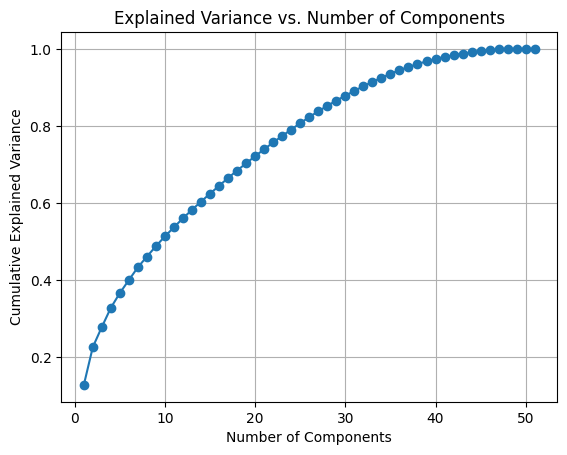

In [26]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [27]:
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 37


In [28]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

In [29]:
# Sort features by their contribution to PC1
important_features_pc1 = loadings_df.loc['PC1'].abs().sort_values(ascending=False)
print(important_features_pc1)

Touches                   0.341555
Carries                   0.335452
Passes Attempted          0.327116
Passes Completed          0.322408
Progressive Passes        0.288634
Minutes                   0.271611
Shot-Creating Actions     0.239810
Progressive Carries       0.188673
Total Shoot               0.162885
TeamProgression           0.153787
Expected Assists (xAG)    0.147817
TeamShots                 0.139716
Dribble Attempts          0.137655
Successful Dribbles       0.137053
Pass Completion %         0.134501
Dribbles                  0.134200
TeamPassAccuracy          0.129893
Tackles                   0.129447
Goal-Creating Actions     0.114159
Shoot on Target           0.112719
TeamxG                    0.110015
Blocks                    0.109569
Non-Penalty xG (npxG)     0.102109
Expected Goals (xG)       0.100278
Assists                   0.091677
Position_FW               0.080899
Position_CB               0.080677
RollingAvgGoals           0.063034
Team                

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_scaled, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display top 10 features
print(feature_importances.head(10))

RollingAvgGoals          0.365197
Shoot on Target          0.235776
Expected Goals (xG)      0.083107
Player                   0.018048
Age                      0.015263
Pass Completion %        0.015113
Penalty Shoot on Goal    0.014438
TeamDribbles             0.014212
TeamPassAccuracy         0.014017
TeamxG                   0.013569
dtype: float64
